<a href="https://colab.research.google.com/github/Prince00954/code-with-prince/blob/main/TweetSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Package**

In [ ]:
!pip install tweepy

**Add Credentials**

In [ ]:
access_token = "501682241-ZG1DshytyxUIUY8FXPoH2AXaDG9d5DQlORemfAzU"
access_token_secret = "mxwCYkDjgWG5qWy8ONtVs3j2lxiYSxyberVVa92jmd27z"
consumer_key = "we0Drpnvc1FZNazKkiKoFWlGf"
consumer_secret = "OXRvmJwM6ca9k90XMIMoktSCa5XvjNieqJivcfjbOAlmpO6RhH"

In [15]:
import os
import tweepy as tw

In [16]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

*Look for tweets and build a dataframe*

In [ ]:
import tweepy
import pandas as pd

#  Paste your Bearer Token here
bearer_token = "AAAAAAAAAAAAAAAAAAAAAHG22gEAAAAArwT1YFj0Vl7nGSqQdH1afHxXnhM%3DLTKH3InXSDfwpWLPgzcUBfDkcyw9wBWoUfIIZjSH7UD1D1tSJe"

# Set up the Twitter Client
client = tweepy.Client(bearer_token=bearer_token)

# Search recent tweets
query = "dengue -is:retweet lang:en"
response = client.search_recent_tweets(query=query, max_results=100)

# Save tweets in a DataFrame
tweets = response.data
if tweets:
    df = pd.DataFrame([tweet.text for tweet in tweets], columns=["Tweets"])
    display(df.head(10))
else:
    print("No tweets found.")

,Tweets
0,How do the larvae of Culex (vector of bancroft...
1,@goldenrrry I got dengue in 2020 and egg taste...
2,@ysjagan Killing his supporters like dengue an...
3,@Hereprak How fear a simple Murugan Manadu has...
4,10th boards = “career deciding year.”\nBut wha...
5,@SaffronQueen_ Dirty devil is very comfortable...
6,@iSupriya9 Respecting Hindu Traditions 👍❤️ &am...
7,Dengue awareness campaign along with identific...
8,#dengue is taking a devastating turn in #Bargu...
9,"Roads in Alipur, Phirni Road near Shivam Dhara..."


In [ ]:
df #not 'data'

,Tweets
0,How do the larvae of Culex (vector of bancroft...
1,@goldenrrry I got dengue in 2020 and egg taste...
2,@ysjagan Killing his supporters like dengue an...
3,@Hereprak How fear a simple Murugan Manadu has...
4,10th boards = “career deciding year.”\nBut wha...
...,...
95,@IndianGems_ Only Islam and Christianity must ...
96,No ivory tower. No gatekeeping.\nWe simplify s...
97,@IndianGems_ Like his father had ridiculed Ra...
98,@UNICEF @UNICEF_EAPRO @UNICEFPacific @spc_cps ...


Find more at [Tweet Extraction](https://github.com/RodolfoFerro/pandas_twitter/blob/master/01-extracting-data.md)

In [ ]:
df.head(10)

,Tweets
0,How do the larvae of Culex (vector of bancroft...
1,@goldenrrry I got dengue in 2020 and egg taste...
2,@ysjagan Killing his supporters like dengue an...
3,@Hereprak How fear a simple Murugan Manadu has...
4,10th boards = “career deciding year.”\nBut wha...
5,@SaffronQueen_ Dirty devil is very comfortable...
6,@iSupriya9 Respecting Hindu Traditions 👍❤️ &am...
7,Dengue awareness campaign along with identific...
8,#dengue is taking a devastating turn in #Bargu...
9,"Roads in Alipur, Phirni Road near Shivam Dhara..."


In [ ]:
# Save tweets to a CSV file
df.to_csv("tweets.csv", index=False)

# Optional: download in Colab
from google.colab import files
files.download("tweets.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
text = " ".join(review for review in df["Tweets"])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 516 words in the combination of all review.


In [19]:
# Create stopword list:
stopwords = set(STOPWORDS)

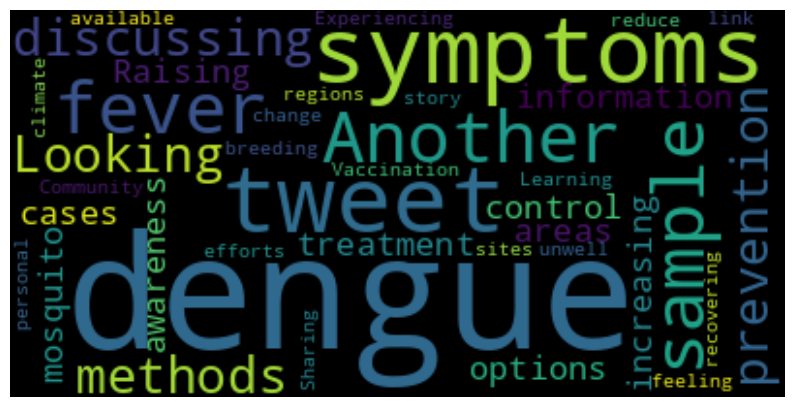

In [20]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud

In [ ]:
df["mytext_new"] = df['Tweets'].str.lower().str.replace('[^\w\s]','')


new_df = df.mytext_new.str.split(expand=True).stack().value_counts().reset_index()

new_df.columns = ['Word', 'Frequency']

new_df.head(10)

,Word,Frequency
0,the,86
1,of,73
2,dengue,66
3,and,62
4,to,47
5,in,46
6,is,42
7,for,34
8,a,26
9,i,22
